In [1]:
!pip install google-cloud-storage pandas
!pip install pyarrow fsspec gcsfs scikit-learn matplotlib
import pandas as pd
import pyarrow.parquet as pq
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [8]:
## Get files from google cloud bucket and append it to 1 big df

base_url = 'gs://temp_nix_1/ie_finish_'
extension = '.parquet'

urls = [base_url + str(i).zfill(12) + extension for i in range(60)]
print(urls)

file_urls = urls

# Initialize an empty list to store individual DataFrames
dfs = []

# Load each file into a DataFrame and append it to the list
for file_url in file_urls:
    print(file_url)
    df_temp = pd.read_parquet(file_url, engine='pyarrow')
    dfs.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

['gs://temp_nix_1/ie_finish_000000000000.parquet', 'gs://temp_nix_1/ie_finish_000000000001.parquet', 'gs://temp_nix_1/ie_finish_000000000002.parquet', 'gs://temp_nix_1/ie_finish_000000000003.parquet', 'gs://temp_nix_1/ie_finish_000000000004.parquet', 'gs://temp_nix_1/ie_finish_000000000005.parquet', 'gs://temp_nix_1/ie_finish_000000000006.parquet', 'gs://temp_nix_1/ie_finish_000000000007.parquet', 'gs://temp_nix_1/ie_finish_000000000008.parquet', 'gs://temp_nix_1/ie_finish_000000000009.parquet', 'gs://temp_nix_1/ie_finish_000000000010.parquet', 'gs://temp_nix_1/ie_finish_000000000011.parquet', 'gs://temp_nix_1/ie_finish_000000000012.parquet', 'gs://temp_nix_1/ie_finish_000000000013.parquet', 'gs://temp_nix_1/ie_finish_000000000014.parquet', 'gs://temp_nix_1/ie_finish_000000000015.parquet', 'gs://temp_nix_1/ie_finish_000000000016.parquet', 'gs://temp_nix_1/ie_finish_000000000017.parquet', 'gs://temp_nix_1/ie_finish_000000000018.parquet', 'gs://temp_nix_1/ie_finish_000000000019.parquet',

gs://temp_nix_1/ie_finish_000000000004.parquet
gs://temp_nix_1/ie_finish_000000000005.parquet
gs://temp_nix_1/ie_finish_000000000006.parquet
gs://temp_nix_1/ie_finish_000000000007.parquet
gs://temp_nix_1/ie_finish_000000000008.parquet
gs://temp_nix_1/ie_finish_000000000009.parquet
gs://temp_nix_1/ie_finish_000000000010.parquet
gs://temp_nix_1/ie_finish_000000000011.parquet
gs://temp_nix_1/ie_finish_000000000012.parquet
gs://temp_nix_1/ie_finish_000000000013.parquet
gs://temp_nix_1/ie_finish_000000000014.parquet
gs://temp_nix_1/ie_finish_000000000015.parquet
gs://temp_nix_1/ie_finish_000000000016.parquet
gs://temp_nix_1/ie_finish_000000000017.parquet
gs://temp_nix_1/ie_finish_000000000018.parquet
gs://temp_nix_1/ie_finish_000000000019.parquet
gs://temp_nix_1/ie_finish_000000000020.parquet
gs://temp_nix_1/ie_finish_000000000021.parquet
gs://temp_nix_1/ie_finish_000000000022.parquet
gs://temp_nix_1/ie_finish_000000000023.parquet
gs://temp_nix_1/ie_finish_000000000024.parquet
gs://temp_nix

In [14]:
# print(df.head(5))
# df.sort_values(by='time', inplace=True)
df = df_2
df['type'] = df['type'].map({6: 1, 5: 0, 4: 0})

In [13]:
print(df.columns)

Index(['time', 'type', 'collection_id', 'scheduling_class', 'missing_type',
       'collection_type', 'priority', 'alloc_collection_id', 'instance_index',
       'machine_id', 'alloc_instance_index', 'constraint', 'req_cpu',
       'req_mem'],
      dtype='object')


In [14]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
columns_to_save = ['time', 'type', 'collection_id', 'scheduling_class',
                   'collection_type', 'priority', 'alloc_collection_id', 'instance_index',
                   'machine_id', 'alloc_instance_index', 'req_cpu',
                   'req_mem']

# Create a new DataFrame containing only the specified columns
selected_columns_df = df[columns_to_save]

# Save the selected columns to a Parquet file
selected_columns_df.to_parquet('job_fail_sucess_small.parquet', index=False)


In [6]:
df = pd.read_parquet('job_fail_success.parquet')

ArrowInvalid: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

In [6]:
def print_acc(acc_m):
    sum_acc = 0

    for elem, items in acc_m.items():
        sum_acc += items["accuracy"]

    print(f"Average accuracy: {sum_acc/acc_m.__len__()}")

In [28]:
df = pd.read_parquet("job_fail_success.parquet")

In [11]:
df_2 = pd.read_csv("machine_new_.csv")

In [12]:
print(df_2.columns)

Index(['time', 'type', 'cpus', 'memory', 'scheduling_class', 'priority'], dtype='object')


In [17]:
import matplotlib.pyplot as plt
import itertools

def print_acc(acc_m):
    sum_acc = 0

    for elem, items in acc_m.items():
        sum_acc += items["accuracy"]

    print(f"Average accuracy: {sum_acc/acc_m.__len__()}")

def plot_graph(list_of_data_dicts, labels, machine_id):
    plt.figure(figsize=(21, 6))  # Increase the width while keeping the height
    
    distinct_colors = itertools.cycle(['b', 'g', 'c', 'm', 'y', 'k'])
    distinct_markers = itertools.cycle(['^', '*', 's', 'd', 'p', 'h', 'x', '+'])


    for idx, data_dict in enumerate(list_of_data_dicts):
        x_values = []
        y_values = []
        
        color = next(distinct_colors)  # Get the next distinct color
        marker = next(distinct_markers)  # Get the next distinct marker

        for key, value_dict in data_dict.items():
            if key != "label" and key <= 25:
                x_values.append(str(key))
                y_values.append(float(value_dict.get('accuracy', 0)))
            if idx == 0 and value_dict.get('event', False):
                plt.axvline(x=len(x_values) - 1, color='r', linestyle='-', label='Event ')
            if value_dict.get('retrain', False) and "accuracy" in labels[idx].lower() :
                plt.axvline(x=len(x_values) - 1, color=color, linestyle=(0, (5, 10)), label='Retrain ' + labels[idx])

                
        plt.plot(x_values, y_values, marker=marker,markersize=11, label=str(labels[idx]))
        
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Sort the dictionary by keys
    sorted_by_label = dict(sorted(by_label.items()))

    # Create a legend using the sorted dictionary
    plt.legend(sorted_by_label.values(), sorted_by_label.keys())

    plt.xlabel('Chunk')
    plt.ylabel('Accuracy')
    plt.title('Accuracy ' + machine_id)
    # plt.grid(True)
    plt.show()

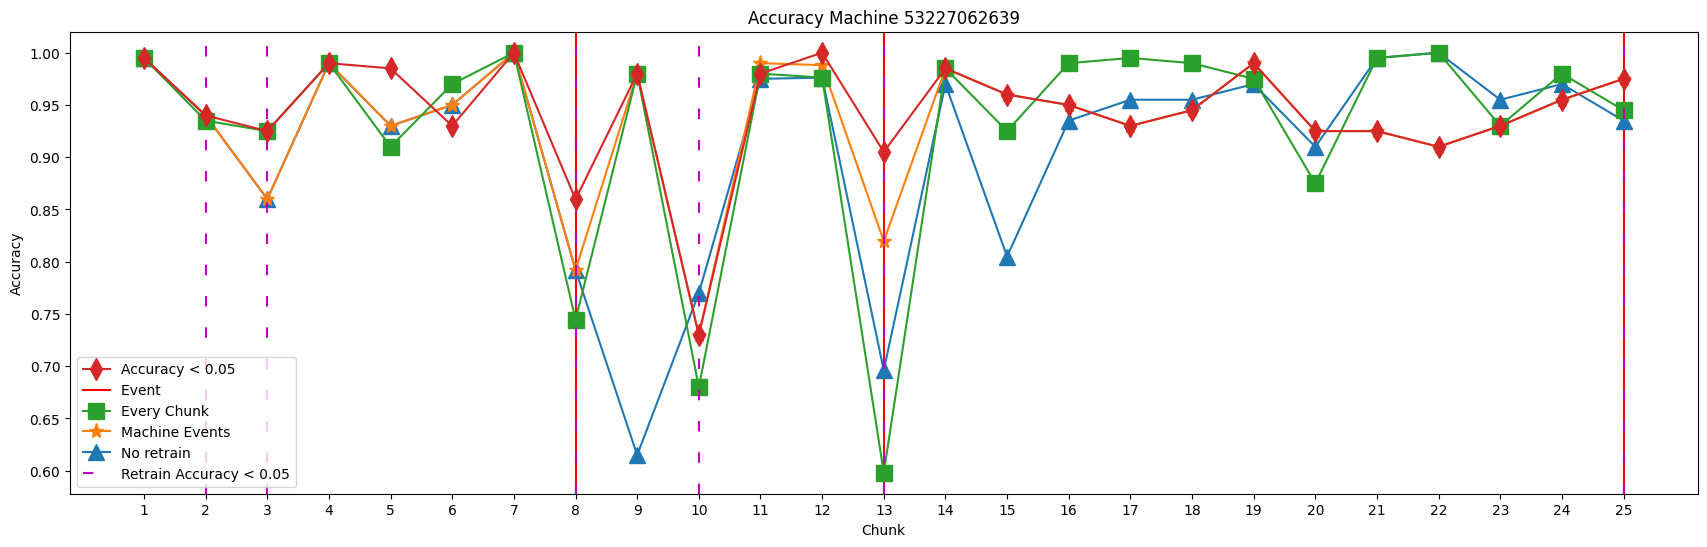

In [18]:
plot_graph([result_0, result_1, result_2, result_3], ["No retrain", "Machine Events", "Every Chunk", "Accuracy < 0.05"], "Machine 53227062639")

In [9]:
!pip install xgboost

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize the baseline accuracy

machine_events = {
    391504098: [406758229027, 2316349146946, -1],
    52475735496: [209421768081, 1728728512578, -1],
    87524700536: [99611932034, 1977204455957, -1],
    # 53227062639: [282636397897,300721411580,399366609955, 2432294115940, -1],
    53227062639: [282636397897,399366609955, 2432294115940, -1],
    210042575297: [665636998933, 1972690118807, -1],
    52475735496: [209421768081,1728728512578,1850050242288, -1],
    34197624053: [10579110684,469706743246,2163016226696, -1]

}

def train_machine(machine_id, chunk_size = 100, retrain_event=False, retrain_every_chunk =False, acc=None):
    index = 0
    print(f"Machine: {machine_id}, Chunk Size: {chunk_size}, Retrain at machine event: {retrain_event}, Retrain every chunk: {retrain_every_chunk}, Retrain accuracy drop: {acc}")
    chunk_metrics = {}
    baseline_accuracy = None
    data = df_2
    # data = df.loc[df['machine_id'] == machine_id]
    data.sort_values(by='time', inplace=True)
    retrainings = []

    rows_to_move = pd.DataFrame() # Initialize a list to hold rows to be moved to the next chunk
    event_flag = False
    # Iterate over the dataset in chunks
    for start_idx in range(0, len(data), chunk_size):
        retrain_flag = True if event_flag else False
        event_flag = False
        end_idx = start_idx + chunk_size

        # Include rows from the previous iteration that need to be moved
        current_chunk = pd.concat([rows_to_move, data.iloc[start_idx:end_idx]],ignore_index=True)
        # print(len(current_chunk))
        rows_to_move = pd.DataFrame()

        event_time = machine_events[machine_id][index]
        # print(f"Event time: {event_time}, first chunk: {current_chunk.iloc[0]['time']}, last_chunk : {current_chunk.iloc[len(current_chunk)-1]['time']}")
        if event_time != -1:
            if (current_chunk.iloc[len(current_chunk)-1]['time'] > machine_events[machine_id][index] and  machine_events[machine_id][index] != -1):
                event_flag = True
                index += 1
                rows_to_move = current_chunk[current_chunk['time'] > event_time]
                current_chunk = current_chunk[current_chunk['time'] < event_time]
                print("Machine event happened at this chunk! Moving block to next chunk..")
        # print(len(current_chunk))
        current_chunk.reset_index()

        # Split into features (X) and target (y)
        # X = current_chunk.drop(columns=['type', 'time', 'machine_id','alloc_instance_index', 'instance_index', 'alloc_collection_id', 'collection_type', 'missing_type', 'collection_id', 'constraint'])
        X = current_chunk.drop(columns=['type', 'time'])
        y = current_chunk['type']

        # Data Preprocessing (Example: Scaling numerical features)
        if baseline_accuracy is None:
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            # Model Training
            # model = GradientBoostingClassifier()
            model = xgb.XGBClassifier()

            # X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
            model.fit(X_scaled, y)
            # y_pred = model.predict(X_test)
            y_pred = model.predict(X_scaled)
            baseline_accuracy = accuracy_score(y, y_pred)
        else:
            X_scaled = scaler.transform(X)

        # Model Evaluation
        y_pred = model.predict(X_scaled)
        accuracy = accuracy_score(y, y_pred)
        report = classification_report(y, y_pred)
        chunk_metrics[start_idx // chunk_size + 1] = {'accuracy': accuracy, 'classification': report, 'event': retrain_flag, "retrain": False}
        # Print results
        # print(f"Time: {current_chunk.iloc[0]['time']}")
        print(f"Chunk {start_idx // chunk_size + 1}: Size: {len(current_chunk)} Baseline: {baseline_accuracy} Accuracy = {accuracy:.4f}, Time = {current_chunk.iloc[len(current_chunk)-1]['time']}")
        if baseline_accuracy is None:
            baseline_accuracy = accuracy


        # Check if model needs retraining
        if retrain_every_chunk or (retrain_event and retrain_flag) or (acc and baseline_accuracy-accuracy > acc):
            if retrain_event:
                print(f"Machine event at {machine_events[machine_id][index-1]}! Retraining..")
            elif acc:
                print("Performanced dropped, retraining...")
            else:
                print("Retraining... ")
            
            if (len(current_chunk) < 10):
                print("Chunk size too small!! Skipping retrain.")
                continue
            
            retrain_flag = False
            chunk_metrics[start_idx // chunk_size + 1]["retrain"] = True

            # Retrain the model on the full chunk (X and y)
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
            # model = GradientBoostingClassifier()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            baseline_accuracy = accuracy_score(y_test, y_pred)
            print("Model retrained.")
            retrainings.append(start_idx // chunk_size + 1)

    print(f"Number of retrains: {len(retrainings)}")
    print(retrainings)
    print_acc(chunk_metrics)
    print()
    return chunk_metrics


# print("\n\nMACHINE 1\n\n")
# result_0_1 = train_machine(391504098)
# result_1_1 = train_machine(391504098, retrain_event=True)
# result_2_1 = train_machine(391504098, retrain_every_chunk=True)
# result_3_1 = train_machine(391504098, acc=0.05)

# print("\n\nMACHINE 2\n\n")
# train_machine(52475735496, retrain=False)
# train_machine(52475735496, retrain=True)
# percent_drops(52475735496)
# print("\n\nMACHINE 3\n\n")
# train_machine(87524700536, retrain=False)
# train_machine(87524700536, retrain=True)
# percent_drops(87524700536)

# print("\n\nMACHINE 2\n\n")
# result_0 = train_machine(53227062639)
# result_1 = train_machine(53227062639, retrain_event=True)
# result_2 = train_machine(53227062639, retrain_every_chunk=True)
# result_3 = train_machine(53227062639, acc=0.05)


# print("\n\nMACHINE 5\n\n")
# train_machine(210042575297, retrain=False)
# train_machine(210042575297, retrain=True)
# percent_drops(210042575297)

# print("\n\nMACHINE 6\n\n")
# train_machine(52475735496, retrain=False)
# train_machine(52475735496, retrain=True)
# percent_drops(52475735496)

# print("\n\nMACHINE 7\n\n")
# train_machine(34197624053, retrain=False)
# train_machine(34197624053, retrain=True)
# percent_drops(34197624053)




Defaulting to user installation because normal site-packages is not writeable


In [171]:
print("\n\nMACHINE 1\n\n")
result_0_1 = train_machine(391504098)
result_1_1 = train_machine(391504098, retrain_event=True)
result_2_1 = train_machine(391504098, retrain_every_chunk=True)
result_3_1 = train_machine(391504098, acc=0.05)



MACHINE 1


Machine: 391504098, Chunk Size: 100, Retrain at machine event: False, Retrain every chunk: False, Retrain accuracy drop: None
Chunk 1: Size: 100 Baseline: 1.0 Accuracy = 1.0000, Time = 210880606951
Machine event happened at this chunk! Moving block to next chunk..
Chunk 2: Size: 83 Baseline: 1.0 Accuracy = 0.8675, Time = 398355908608
Chunk 3: Size: 117 Baseline: 1.0 Accuracy = 0.7863, Time = 565765507329
Chunk 4: Size: 100 Baseline: 1.0 Accuracy = 0.5500, Time = 680130002218
Chunk 5: Size: 100 Baseline: 1.0 Accuracy = 0.7600, Time = 924577450342
Chunk 6: Size: 100 Baseline: 1.0 Accuracy = 0.8200, Time = 1180204306438
Chunk 7: Size: 100 Baseline: 1.0 Accuracy = 0.9100, Time = 1327579106379
Chunk 8: Size: 100 Baseline: 1.0 Accuracy = 0.9000, Time = 1404333772991
Chunk 9: Size: 100 Baseline: 1.0 Accuracy = 0.8700, Time = 1520094342466
Chunk 10: Size: 100 Baseline: 1.0 Accuracy = 0.9500, Time = 1659044532899
Chunk 11: Size: 100 Baseline: 1.0 Accuracy = 0.9800, Time = 18852268

In [4]:
df_2

NameError: name 'df_2' is not defined

In [15]:
print("\n\nMACHINE 2\n\n")
result_0 = train_machine(53227062639, chunk_size = 200)
result_1 = train_machine(53227062639, retrain_event=True, chunk_size=200)
result_2 = train_machine(53227062639, retrain_every_chunk=True, chunk_size = 200)
result_3 = train_machine(53227062639, acc=0.05, chunk_size = 200)




MACHINE 2


Machine: 53227062639, Chunk Size: 200, Retrain at machine event: False, Retrain every chunk: False, Retrain accuracy drop: None
Chunk 1: Size: 200 Baseline: 0.995 Accuracy = 0.9950, Time = 34249674503.0
Chunk 2: Size: 200 Baseline: 0.995 Accuracy = 0.9400, Time = 60480842641.0
Chunk 3: Size: 200 Baseline: 0.995 Accuracy = 0.8600, Time = 124212228901.0
Chunk 4: Size: 200 Baseline: 0.995 Accuracy = 0.9900, Time = 194020818126.0
Chunk 5: Size: 200 Baseline: 0.995 Accuracy = 0.9300, Time = 223863022386.0
Chunk 6: Size: 200 Baseline: 0.995 Accuracy = 0.9500, Time = 281987948270.0
Machine event happened at this chunk! Moving block to next chunk..
Chunk 7: Size: 1 Baseline: 0.995 Accuracy = 1.0000, Time = 282201362670.0
Chunk 8: Size: 399 Baseline: 0.995 Accuracy = 0.7920, Time = 300721412732.0
Chunk 9: Size: 200 Baseline: 0.995 Accuracy = 0.6150, Time = 312382154609.0
Chunk 10: Size: 200 Baseline: 0.995 Accuracy = 0.7700, Time = 363128449177.0
Chunk 11: Size: 200 Baseline: 0.99

Model retrained.
Chunk 9: Size: 200 Baseline: 0.925 Accuracy = 0.9800, Time = 312382154609.0
Chunk 10: Size: 200 Baseline: 0.925 Accuracy = 0.7300, Time = 363128449177.0
Chunk 11: Size: 200 Baseline: 0.925 Accuracy = 0.9900, Time = 385979031362.0
Machine event happened at this chunk! Moving block to next chunk..
Chunk 12: Size: 84 Baseline: 0.925 Accuracy = 0.9881, Time = 398317628226.0
Chunk 13: Size: 316 Baseline: 0.925 Accuracy = 0.8196, Time = 460705381796.0
Machine event at 399366609955! Retraining..
Model retrained.
Chunk 14: Size: 200 Baseline: 0.921875 Accuracy = 0.9850, Time = 476375092954.0
Chunk 15: Size: 200 Baseline: 0.921875 Accuracy = 0.9600, Time = 532714186155.0
Chunk 16: Size: 200 Baseline: 0.921875 Accuracy = 0.9500, Time = 693328740803.0
Chunk 17: Size: 200 Baseline: 0.921875 Accuracy = 0.9300, Time = 737507557241.0
Chunk 18: Size: 200 Baseline: 0.921875 Accuracy = 0.9450, Time = 796816701130.0
Chunk 19: Size: 200 Baseline: 0.921875 Accuracy = 0.9900, Time = 8197943

/home/cc/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cc/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cc/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Chunk 42: Size: 200 Baseline: 0.95 Accuracy = 0.9650, Time = 2205229520703.0
Retraining... 
Model retrained.
Chunk 43: Size: 200 Baseline: 0.975 Accuracy = 1.0000, Time = 2286854069175.0
Retraining... 
Model retrained.
Chunk 44: Size: 200 Baseline: 1.0 Accuracy = 0.9800, Time = 2373632620986.0
Retraining... 
Model retrained.
Machine event happened at this chunk! Moving block to next chunk..
Chunk 45: Size: 111 Baseline: 0.975 Accuracy = 0.8378, Time = 2431186420173.0
Retraining... 
Model retrained.
Chunk 46: Size: 289 Baseline: 0.9565217391304348 Accuracy = 0.8893, Time = 2447406125787.0
Retraining... 
Model retrained.
Chunk 47: Size: 200 Baseline: 0.9482758620689655 Accuracy = 0.9900, Time = 2466290729520.0
Retraining... 
Model retrained.
Chunk 48: Size: 200 Baseline: 1.0 Accuracy = 0.9500, Time = 2477552472826.0
Retraining... 
Model retrained.
Chunk 49: Size: 200 Baseline: 0.925 Accuracy = 0.9650, Time = 2535811640564.0
Retraining... 
Model retrained.
Chunk 50: Size: 200 Baseline: 0.

/home/cc/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cc/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cc/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model retrained.
Chunk 53: Size: 159 Baseline: 1.0 Accuracy = 0.9434, Time = 2674570391861.0
Retraining... 
Model retrained.
Number of retrains: 52
[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Average accuracy: 0.939418114432514

Machine: 53227062639, Chunk Size: 200, Retrain at machine event: False, Retrain every chunk: False, Retrain accuracy drop: 0.05
Chunk 1: Size: 200 Baseline: 0.995 Accuracy = 0.9950, Time = 34249674503.0
Chunk 2: Size: 200 Baseline: 0.995 Accuracy = 0.9400, Time = 60480842641.0
Performanced dropped, retraining...
Model retrained.
Chunk 3: Size: 200 Baseline: 1.0 Accuracy = 0.9250, Time = 124212228901.0
Performanced dropped, retraining...
Model retrained.
Chunk 4: Size: 200 Baseline: 0.95 Accuracy = 0.9900, Time = 194020818126.0
Chunk 5: Size: 200 Baseline: 0.95 Accuracy = 0.9850, Time = 223863022386.0
Chunk 

In [50]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def pca_machine(machine_id, chunk_size=200):
    index = 0
    print(f"Machine: {machine_id}")
    data = df_2
    # data = df.loc[df['machine_id'] == machine_id]
    data.sort_values(by='time', inplace=True)

    rows_to_move = pd.DataFrame() # Initialize a list to hold rows to be moved to the next chunk
    event_flag = False
    pca = None
    # Iterate over the dataset in chunks
    for start_idx in range(0, len(data), chunk_size):
        retrain_flag = True if event_flag else False
        event_flag = False
        end_idx = start_idx + chunk_size

        # Include rows from the previous iteration that need to be moved
        current_chunk = pd.concat([rows_to_move, data.iloc[start_idx:end_idx]],ignore_index=True)
        # print(len(current_chunk))
        rows_to_move = pd.DataFrame()

        event_time = machine_events[machine_id][index]
        # print(f"Event time: {event_time}, first chunk: {current_chunk.iloc[0]['time']}, last_chunk : {current_chunk.iloc[len(current_chunk)-1]['time']}")
        if event_time != -1:
            if (current_chunk.iloc[len(current_chunk)-1]['time'] > machine_events[machine_id][index] and  machine_events[machine_id][index] != -1):
                print(f"An event exists in this chunk (Chunk {start_idx // chunk_size + 1}) and the next chunk!")
                event_flag = True
                index += 1
                rows_to_move = current_chunk[current_chunk['time'] > event_time]
                current_chunk = current_chunk[current_chunk['time'] < event_time]
        print(f"CHUNK {start_idx // chunk_size + 1} LENGTH: {len(current_chunk)}")
        continue
        if (len(current_chunk) < 5):
            continue
        current_chunk.reset_index()
        
        current_chunk.reset_index(drop=True, inplace=True)  # Reset index for proper indexing
        
        # Select relevant columns for PCA
        pca_columns = ["cpus", "memory", "scheduling_class", "priority"]
        pca_data = current_chunk[pca_columns]

        prev_pca = pca
        # Perform PCA
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(pca_data)

        if prev_pca:
            # Calculate the reconstruction of the data
            prev_pca_result = prev_pca.transform(pca_data)
            pca_reconstructed = np.dot(prev_pca_result, prev_pca.components_) + prev_pca.mean_

            # Calculate reconstruction error
            reconstruction_error = np.mean(np.square(pca_data.values - pca_reconstructed))

            print(f"Reconstruction error between previous Chunk and Chunk {start_idx // chunk_size + 1}: {reconstruction_error:.4f}")
        
        # Add PCA results and "type" column to a new DataFrame
        pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
        pca_df["type"] = current_chunk["type"]
        
        # Plotting
        plt.figure()
        colors = ['b', 'r', 'g']  # Change these colors as needed
        symbols = ['o', 'x', '+']  # Change these symbols as needed
        keys = {4: "Evict",
        5: "Fail",
        6: "Finish"}
        for t in [4,5,6]:
            plt.scatter(
                pca_df[pca_df["type"] == t]["PCA1"],
                pca_df[pca_df["type"] == t]["PCA2"],
                c=colors[t-4],
                marker=symbols[t-4],
                label=f'{keys[t]}'
            )
            
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        plt.title(f'Machine {machine_id} - Chunk {start_idx // chunk_size + 1}')
        plt.legend()
        plt.show()



In [38]:
# pca_machine(391504098)

In [51]:
pca_machine(53227062639)

Machine: 53227062639
CHUNK 1 LENGTH: 200
CHUNK 2 LENGTH: 200
CHUNK 3 LENGTH: 200
CHUNK 4 LENGTH: 200
CHUNK 5 LENGTH: 200
CHUNK 6 LENGTH: 200
An event exists in this chunk (Chunk 7) and the next chunk!
CHUNK 7 LENGTH: 1
CHUNK 8 LENGTH: 399
CHUNK 9 LENGTH: 200
CHUNK 10 LENGTH: 200
CHUNK 11 LENGTH: 200
An event exists in this chunk (Chunk 12) and the next chunk!
CHUNK 12 LENGTH: 84
CHUNK 13 LENGTH: 316
CHUNK 14 LENGTH: 200
CHUNK 15 LENGTH: 200
CHUNK 16 LENGTH: 200
CHUNK 17 LENGTH: 200
CHUNK 18 LENGTH: 200
CHUNK 19 LENGTH: 200
CHUNK 20 LENGTH: 200
CHUNK 21 LENGTH: 200
CHUNK 22 LENGTH: 200
CHUNK 23 LENGTH: 200
CHUNK 24 LENGTH: 200
CHUNK 25 LENGTH: 200
CHUNK 26 LENGTH: 200
CHUNK 27 LENGTH: 200
CHUNK 28 LENGTH: 200
CHUNK 29 LENGTH: 200
CHUNK 30 LENGTH: 200
CHUNK 31 LENGTH: 200
CHUNK 32 LENGTH: 200
CHUNK 33 LENGTH: 200
CHUNK 34 LENGTH: 200
CHUNK 35 LENGTH: 200
CHUNK 36 LENGTH: 200
CHUNK 37 LENGTH: 200
CHUNK 38 LENGTH: 200
CHUNK 39 LENGTH: 200
CHUNK 40 LENGTH: 200
CHUNK 41 LENGTH: 200
CHUNK 42 

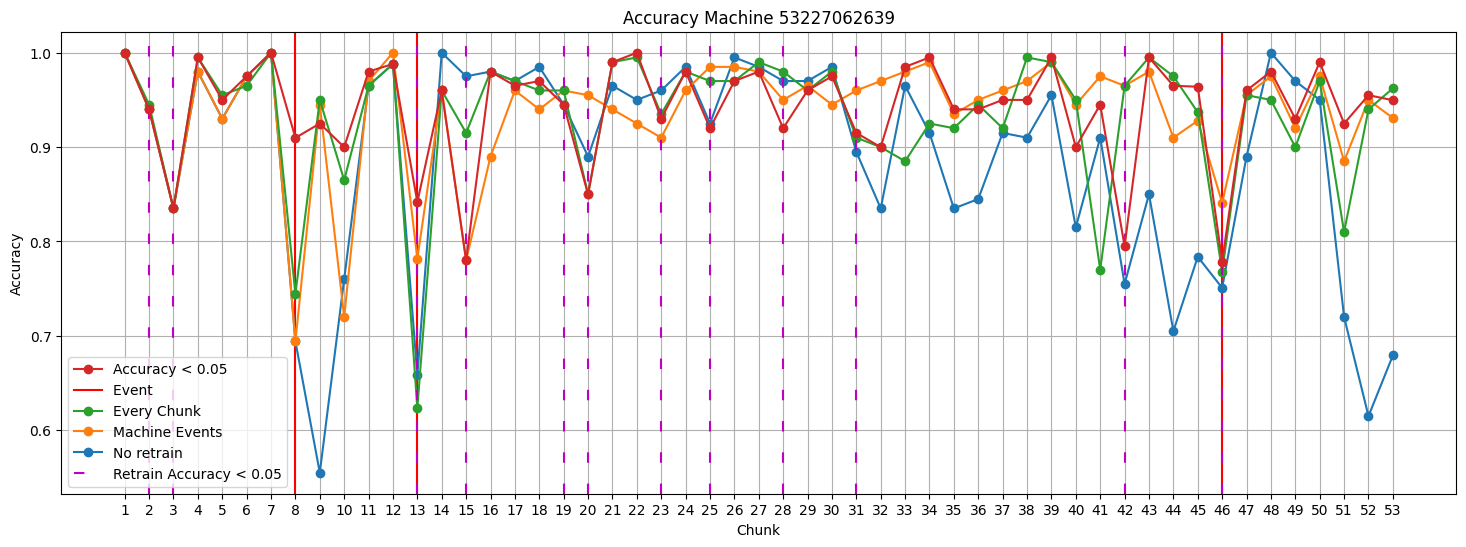

In [195]:
# plot_graph([result_0_1, result_1_1, result_2_1, result_3_1], ["No retrain", "Machine Events", "Every Chunk", "Accuracy < 0.05"], "Machine 391504098")
plot_graph([result_0, result_1, result_2, result_3], ["No retrain", "Machine Events", "Every Chunk", "Accuracy < 0.05"], "Machine 53227062639")

In [198]:
for key, value in result_1.items():
    print(value["classification"])

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       113
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        81

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

              precision    recall  f1-score   support

           4       1.00      0.93      0.96       156
           5       0.75      0.86      0.80         7
           6       0.79      1.00      0.88        37

    accuracy                           0.94       200
   macro avg       0.85      0.93      0.88       200
weighted avg       0.95      0.94      0.94       200

              precision    recall  f1-score   support

           4       1.00      0.65      0.79        91
           5       0.47      0.90      0.62        10
           6       0.81      1.00      0.90        99

    accuracy        

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [204]:
print(df_2.columns)

Index(['time', 'type', 'cpus', 'memory', 'scheduling_class', 'priority'], dtype='object')


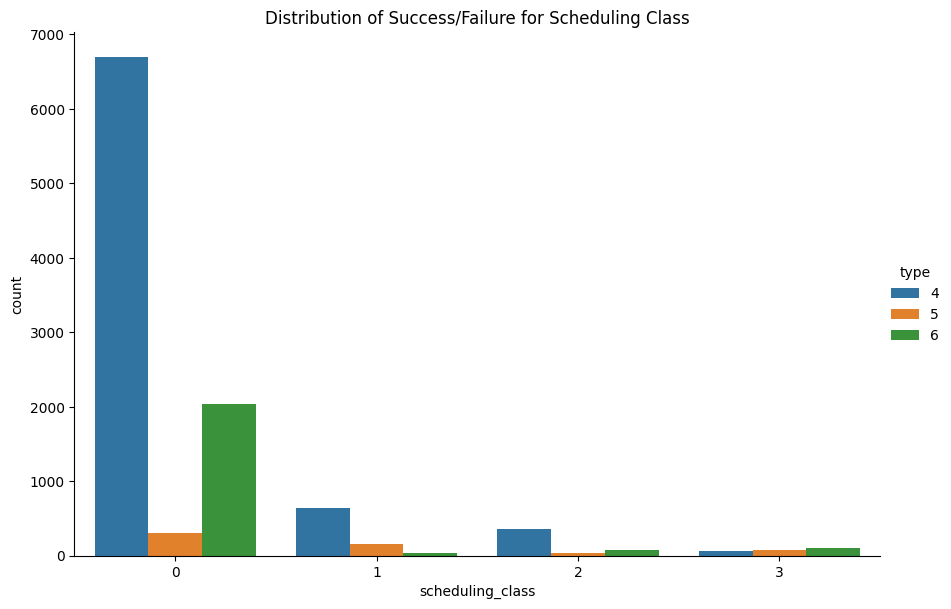

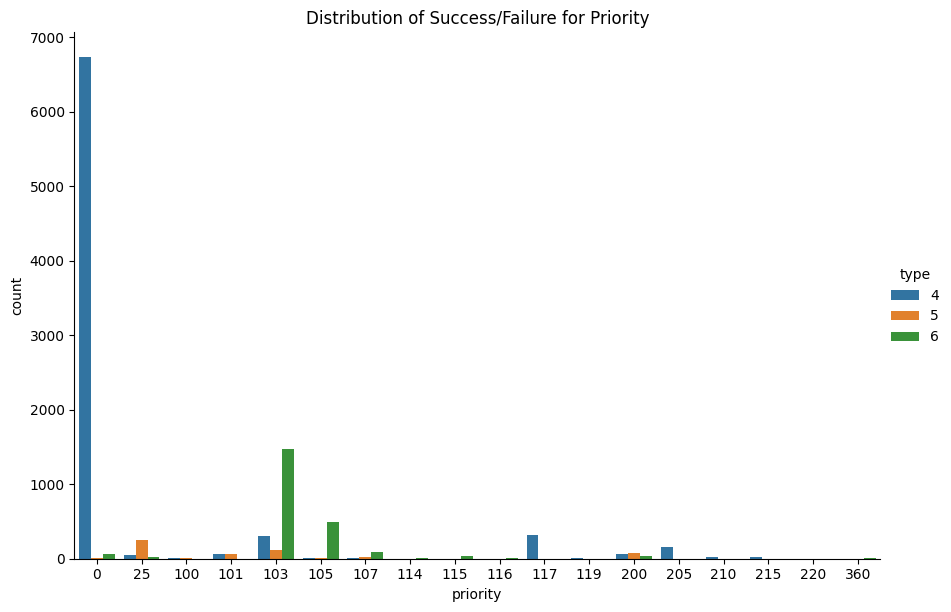

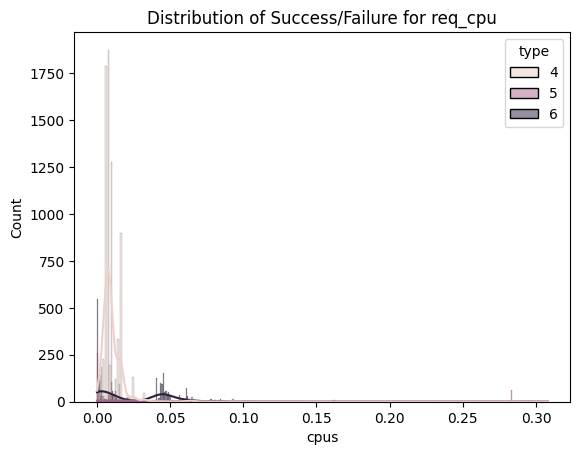

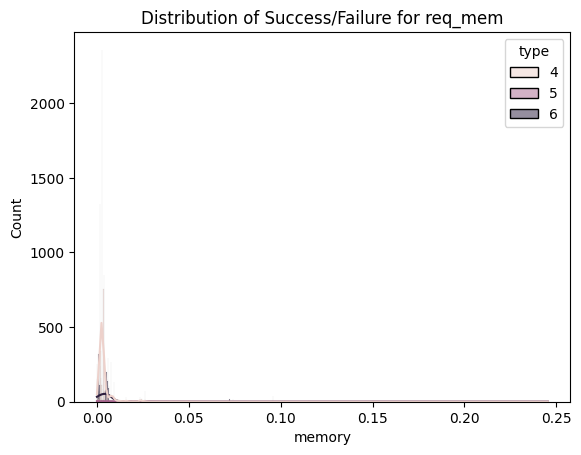

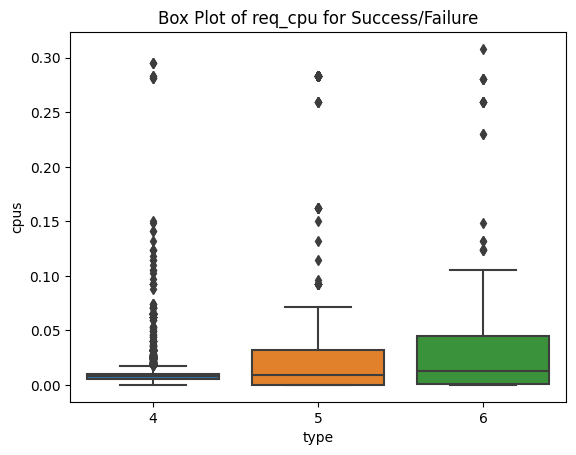

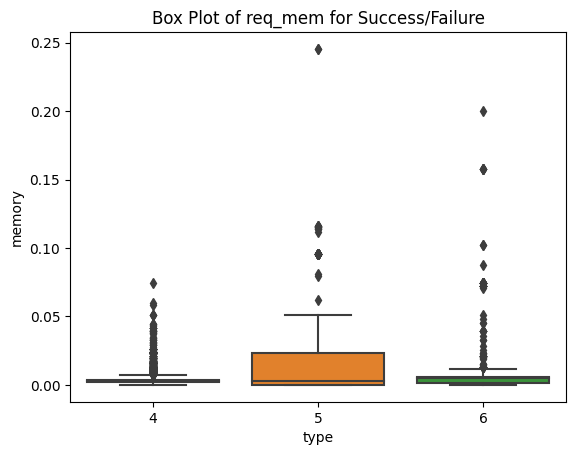

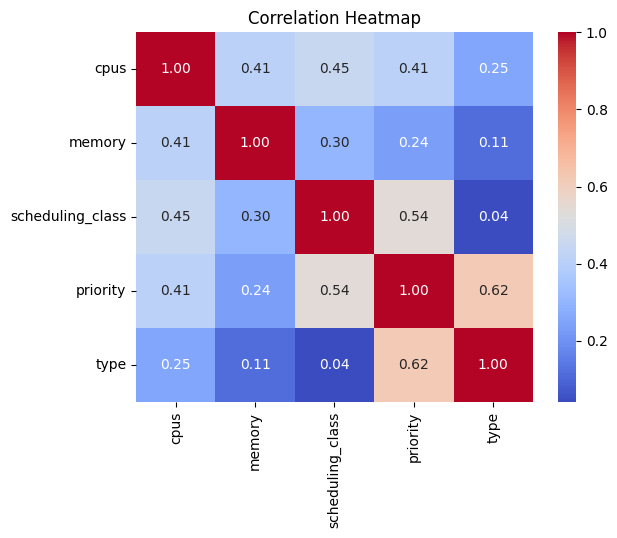

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

X = df_2.drop(columns=['type', 'time'])
y = df_2['type']

# Concatenate X and y into a single DataFrame for easier visualization
data_with_target = pd.concat([X, y], axis=1)

# Define the hue_order to map type labels correctly in the visualizations
hue_order = {4: "Evict", 5: "Fail", 6: "Finish"}

# Bar plot for categorical features
sns.catplot(x='scheduling_class', hue='type', data=data_with_target, kind='count', height=6, aspect=1.5, hue_order=hue_order)
plt.title("Distribution of Success/Failure for Scheduling Class")
plt.show()

sns.catplot(x='priority', hue='type', data=data_with_target, kind='count', height=6, aspect=1.5, hue_order=hue_order)
plt.title("Distribution of Success/Failure for Priority")
plt.show()

# Histograms for numerical features
sns.histplot(data=data_with_target, x='cpus', hue='type', kde=True, hue_order=hue_order)
plt.title("Distribution of Success/Failure for req_cpu")
plt.show()

sns.histplot(data=data_with_target, x='memory', hue='type', kde=True, hue_order=hue_order)
plt.title("Distribution of Success/Failure for req_mem")
plt.show()

# Box plots for numerical features
sns.boxplot(x='type', y='cpus', data=data_with_target, hue_order=hue_order)
plt.title("Box Plot of req_cpu for Success/Failure")
plt.show()

sns.boxplot(x='type', y='memory', data=data_with_target, hue_order=hue_order)
plt.title("Box Plot of req_mem for Success/Failure")
plt.show()

# Heatmap of feature correlations
correlation_matrix = data_with_target.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



In [4]:
# Convert concatenated df to raw
df.to_parquet('raw_google.parquet')

# Processing raw dataset 
## Mapping constraints to an integer
## Getting throttle/non throttle

In [5]:
df = pd.read_parquet("grouped_max.parquet.gz", engine='pyarrow')

In [9]:
def discretize_column(series: pd.Series):
    # return pd.cut(series, bins=n_bins, labels=list(range(n_bins)))
    bin_edges = [
        -float("inf"),
        1,
        float("inf"),
    ]  # Specify the custom bin edges
    return pd.cut(series, bins=bin_edges, labels=False)

# Classify util_cpu > 1 (throttle) and <1 (non throttle)
df["util_cpu_classification"] = discretize_column(
    df["util_cpu"]
)

In [7]:
pd.set_option('display.max_columns', None)
df

,machine_id,start_time,end_time,collection_id,instance_index,alloc_collection_id,cpu_95,sched_class,priority,req_cpu,req_mem,collection_logical_name,collection_max_per_machine,collection_max_per_switch,collection_vertical_scaling,collection_scheduler,req_constraint,machine_cpu_cap,machine_mem_cap,util_cpu,util_cpu_classification
0,31514965170,301000000,739000000,218332160982,163,0,0.001030,0,0,0.008102,0.003582,Es2KZ1kBk5suY33ZpmVtPWLEOmRPIWzn3KciYPkzLSI=,<NA>,<NA>,1,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.127119,0.0
1,85723451736,302000000,1200000000,212549679059,290,0,0.000986,1,200,0.005371,0.005211,kW2p3S1+hEPOfU0NFm0kywvEu9QJmDy15kcrOkXFSvA=,<NA>,<NA>,2,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,1.000000,0.500000,0.183594,0.0
2,155164271,302000000,110400000000,39619462539,0,0,0.004372,2,200,0.002819,0.000447,LDIk5CLYQM5bVDyzqfUncjYbUgH4bKuXuCsmJmyKnSI=,<NA>,<NA>,3,0,[],0.259277,0.166748,1.550744,1.0
3,139894744608,302000000,1549000000,212549673339,4294,0,0.000927,1,200,0.005669,0.002625,GROrxokNbRMmFd1J1BFbszK3+uUiGoMmCIiBjJlGRf0=,<NA>,<NA>,1,0,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,1.000000,0.500000,0.163526,0.0
4,2408873742,302000000,9214000000,218336226901,43,0,0.002972,1,200,0.016205,0.003124,8V2pf9L9vH4kvxXAaHzdtqR05EQ+w11e1bDagOclNRQ=,<NA>,<NA>,1,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.183380,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,42479392074,70697000000,70932000000,219028773294,565,0,0.062744,1,103,0.021057,0.027771,ChGKL4HqDXLF0bazm/++bgEkLGwwzBpl0d57RZqW2Gs=,<NA>,<NA>,2,1,[],0.708984,0.333496,2.979710,1.0
9999996,34118813443,70697000000,71689000000,219028773294,359,0,0.077148,1,103,0.021057,0.027771,ChGKL4HqDXLF0bazm/++bgEkLGwwzBpl0d57RZqW2Gs=,<NA>,<NA>,2,1,[],0.958984,0.500000,3.663768,1.0
9999997,36403660815,70697000000,70945000000,219028773294,549,0,0.059265,1,103,0.021057,0.027771,ChGKL4HqDXLF0bazm/++bgEkLGwwzBpl0d57RZqW2Gs=,<NA>,<NA>,2,1,[],1.000000,0.500000,2.814493,1.0
9999998,39376673014,70697000000,71691000000,219028773294,274,0,0.093018,1,103,0.021057,0.029816,ChGKL4HqDXLF0bazm/++bgEkLGwwzBpl0d57RZqW2Gs=,<NA>,<NA>,2,1,[],0.958984,0.500000,4.417391,1.0


In [ ]:
mapping_dict_coll = {}
# Map 'collection_logical_name' column
df['collection_logical_name_mapped'] = df['collection_logical_name'].map(lambda x: mapping_dict_coll.setdefault(x, len(mapping_dict_coll)))

In [ ]:
df['constraint_str'] = df['req_constraint'].apply(lambda x: str(x))

mapping_dict_const = {}
# Map 'collection_logical_name' column
df['constraint_mapped'] = df['constraint_str'].map(lambda x: mapping_dict_const.setdefault(x, len(mapping_dict_const)))

In [ ]:
df.to_parquet('mapped_google.parquet')

In [2]:
df = pd.read_parquet("../raw_data/google/baseline.parquet", engine='pyarrow')

## Misc (Visualization, exploration, etc)

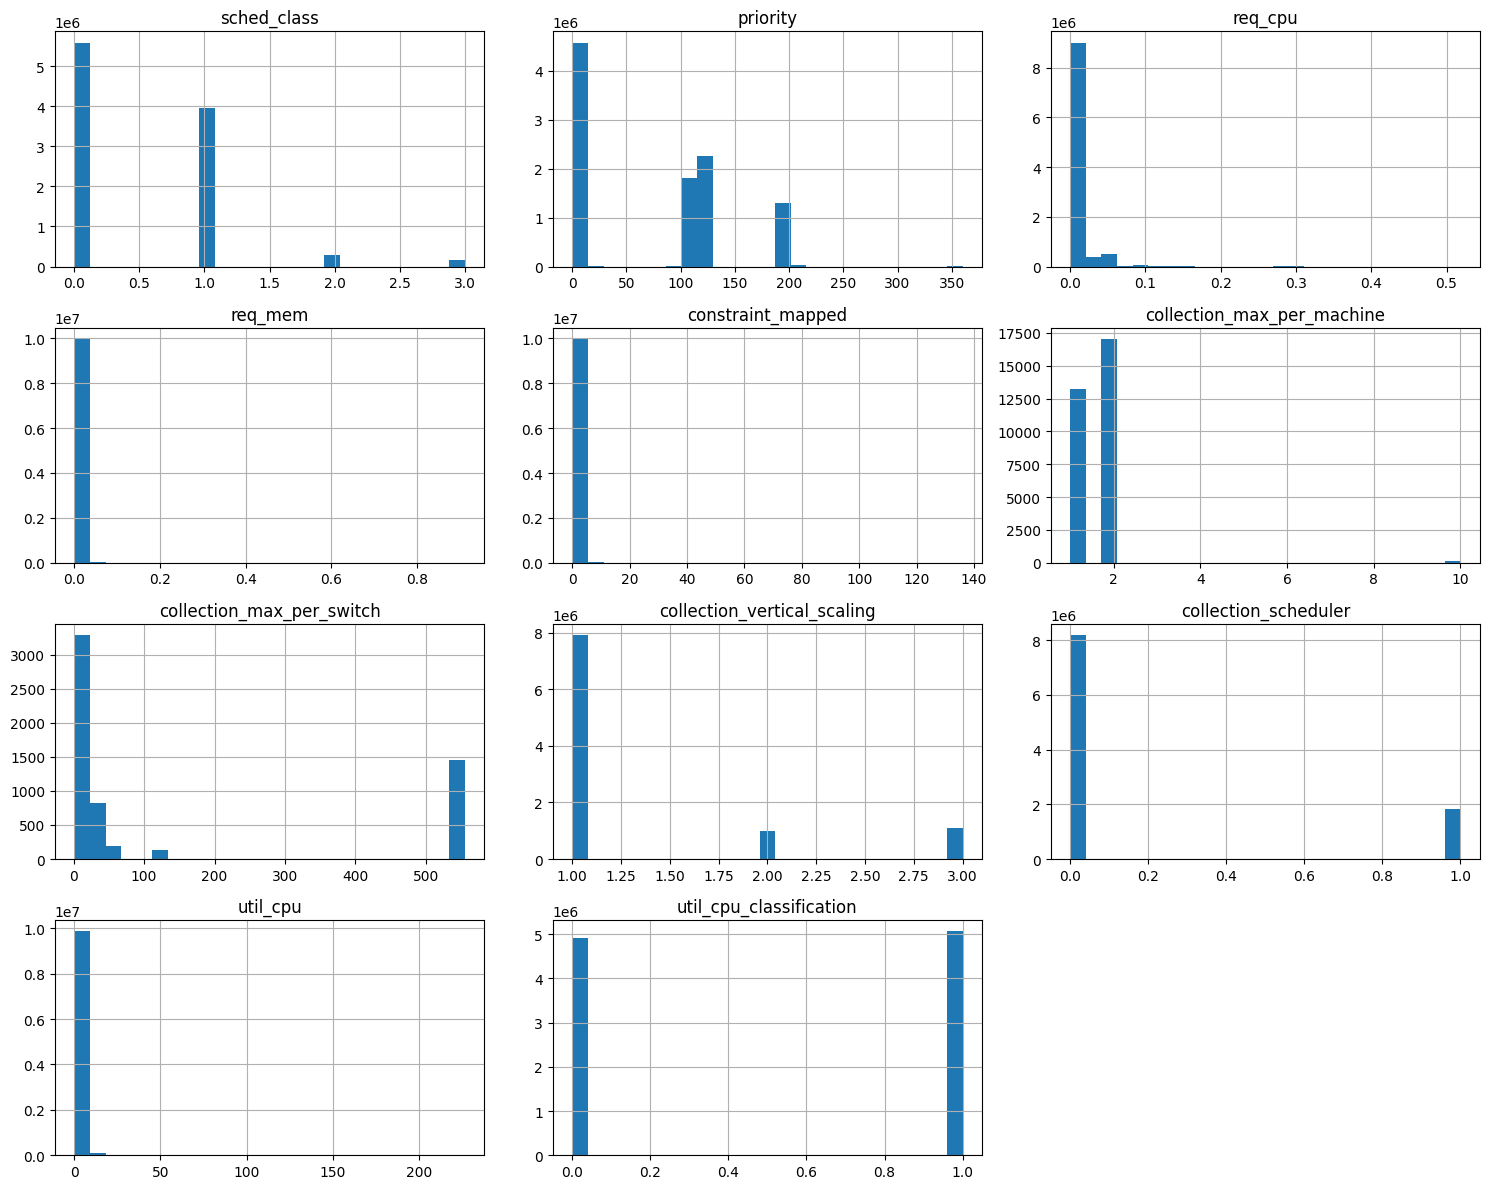

In [ ]:
import matplotlib.pyplot as plt

# Specify the array of column names
columns = ['sched_class', 'priority', 'req_cpu', 'req_mem', 'constraint_mapped', 'collection_logical_name', 'collection_max_per_machine', 'collection_max_per_switch', 'collection_vertical_scaling', 'collection_scheduler', 'util_cpu', 'util_cpu_classification']

# Create the histogram plot
df[columns].hist(bins=25, figsize=(15, 12))
plt.tight_layout()
plt.show()

["sched_class", "collection_scheduler", "collection_vertical_scaling"]

In [ ]:
import matplotlib.pyplot as plt
distribution = df["util_cpu"].value_counts(bins=[0, 0.25, 0.5, 0.75, 1, 100], normalize=True) * 100
distribution

util_cpu
(1.0, 100.0]      50.67079
(-0.001, 0.25]    31.72585
(0.25, 0.5]        8.80779
(0.5, 0.75]        4.48599
(0.75, 1.0]        4.20182
Name: proportion, dtype: float64

In [3]:
df.describe()

,machine_id,start_time,end_time,collection_id,instance_index,alloc_collection_id,cpu_95,sched_class,priority,req_cpu,req_mem,collection_max_per_machine,collection_max_per_switch,collection_vertical_scaling,collection_scheduler,machine_cpu_cap,machine_mem_cap,util_cpu,collection_logical_name_mapped,constraint_mapped
count,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,9.998837e+06,10000000.0,10000000.0,1.000000e+07,1.000000e+07,30392.0,5891.0,10000000.0,10000000.0,1.000000e+07,1.000000e+07,9.989227e+06,1.000000e+07,1.000000e+07
mean,39710629481.763557,34292926729.200001,46284949809.900002,208151520039.372253,11286.942925,649098306.699684,1.282991e-02,0.502025,72.052889,1.161644e-02,3.373880e-03,1.597065,146.38771,1.317637,0.18163,7.035964e-01,4.125751e-01,1.375739e+00,3.378427e+02,8.367149e-01
std,49757998208.482193,19203122530.200737,112248514650.422653,32899347993.34,13700.713343,10253139770.029541,2.040223e-02,0.636662,72.455226,1.440113e-02,4.637868e-03,0.72612,228.531327,0.660608,0.385539,2.751945e-01,1.768588e-01,1.809427e+00,6.639248e+02,9.796323e-01
min,58.0,301000000.0,602000000.0,62.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.0,1.0,1.0,0.0,2.592773e-01,8.337402e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,4234738699.0,17634000000.0,19478000000.0,212549590434.0,771.0,0.0,1.098633e-03,0.0,0.0,5.668640e-03,1.562119e-03,1.0,4.0,1.0,0.0,3.867188e-01,2.500000e-01,1.541050e-01,3.700000e+01,0.000000e+00
50%,29941969266.0,34801000000.0,37288000000.0,212549661125.0,4838.0,0.0,6.050110e-03,0.0,103.0,8.102417e-03,2.605438e-03,2.0,11.0,1.0,0.0,7.089844e-01,5.000000e-01,1.036295e+00,1.850000e+02,1.000000e+00
75%,39369647864.0,49572000000.0,52387000000.0,212549674112.0,18438.0,0.0,1.574707e-02,1.0,117.0,1.052856e-02,3.612518e-03,2.0,130.0,1.0,0.0,9.589844e-01,5.000000e-01,1.767661e+00,3.170000e+02,2.000000e+00
max,218058445339.0,70697000000.0,2679000000000.0,219028794480.0,68075.0,219023337249.0,8.369141e-01,3.0,360.0,5.185547e-01,9.111328e-01,10.0,555.0,3.0,1.0,1.000000e+00,1.000000e+00,2.266320e+02,5.718000e+03,1.360000e+02


In [4]:
# Sort the DataFrame based on 'start_time'
df.sort_values(by='start_time', inplace=True)

df['hour_label'] = df['start_time'] // 3600000000

hour_label_counts = df['hour_label'].value_counts()

# Display the unique values and their respective counts
print(hour_label_counts)


hour_label
12    712020
10    687415
2     625544
7     564822
9     563103
8     546790
4     536161
11    531418
14    530970
13    528073
6     490183
1     486961
15    468222
16    457842
3     457205
0     455700
5     437617
17    355364
18    342388
19    222202
Name: count, dtype: Int64


In [61]:
result_df = df.groupby('hour_label').apply(lambda group: group.head(5000))
# Reset the index of the resulting DataFrame to have a clean index
result_df.reset_index(drop=True, inplace=True)
# Display the resulting DataFrame
hour_label_counts = result_df['hour_label'].value_counts()

# Display the unique values and their respective counts
print(hour_label_counts)

hour_label
0     5000
1     5000
18    5000
17    5000
16    5000
15    5000
14    5000
13    5000
12    5000
11    5000
10    5000
9     5000
8     5000
7     5000
6     5000
5     5000
4     5000
3     5000
2     5000
19    5000
Name: count, dtype: Int64


In [14]:
result_df.dropna(subset=['util_cpu', 'util_cpu_classification'], inplace=True)
result_df.reset_index()

,index,machine_id,start_time,end_time,collection_id,instance_index,alloc_collection_id,cpu_95,sched_class,priority,...,collection_scheduler,req_constraint,machine_cpu_cap,machine_mem_cap,util_cpu,collection_logical_name_mapped,constraint_str,constraint_mapped,hour_label,util_cpu_classification
0,0,31514965170,301000000,739000000,218332160982,163,0,0.001030,0,0,...,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.127119,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0,0,0.0
1,1,85723451736,302000000,1200000000,212549679059,290,0,0.000986,1,200,...,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,1.000000,0.500000,0.183594,1,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0,0,0.0
2,2,155164271,302000000,110400000000,39619462539,0,0,0.004372,2,200,...,0,[],0.259277,0.166748,1.550744,2,[],1,0,1.0
3,3,139894744608,302000000,1549000000,212549673339,4294,0,0.000927,1,200,...,0,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,1.000000,0.500000,0.163526,3,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,2,0,0.0
4,4,2408873742,302000000,9214000000,218336226901,43,0,0.002972,1,200,...,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.183380,4,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399562,399995,31479605862,68599000000,69353000000,212549662498,623,0,0.001101,1,117,...,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.071482,274,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0,19,0.0
399563,399996,34279687949,68599000000,70149000000,212549673090,4279,0,0.020599,1,117,...,0,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,0.708984,0.333496,2.542373,342,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,2,19,1.0
399564,399997,2931601370,68599000000,69292000000,212549662498,692,0,0.000922,1,117,...,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.059898,274,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0,19,0.0
399565,399998,4234691740,68599000000,70149000000,212549673090,4333,0,0.022278,1,117,...,0,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,0.708984,0.666992,2.749529,342,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,2,19,1.0


In [19]:
print(len(result_df))

399567


In [51]:
import pandas as pd
from river import drift

# Assuming your DataFrame is called 'df' and it contains the 'util_cpu_utilization' column

# Extract the 'util_cpu_utilization' column as a data stream
data_stream = result_df['util_cpu_classification']


# For DDM (Drift Detection Method):
binary_detectors = [
    drift.binary.DDM(
        warm_start=30,            # The minimum required number of analyzed samples so change can be detected.
        warning_threshold=2.0,    # Threshold to decide if the detector is in a warning zone.
                                 # The default value gives a 95% confidence level to the warning assessment.
        drift_threshold=4.0       # Threshold to decide if a drift was detected.
                                 # The default value gives a 99% confidence level to the drift assessment.
    ),
    
    # For EDDM (Exponentially Weighted Moving Average Drift Detection Method):
    drift.binary.EDDM(
        warm_start=30,            # The minimum required number of monitored errors/failures so change can be detected.
                                 # Warm start parameter for the drift detector.
        alpha=0.95,               # Threshold for triggering a warning. Must be between 0 and 1.
                                 # The smaller the value, the more conservative the detector becomes.
        beta=0.8                  # Threshold for triggering a drift. Must be between 0 and 1.
                                 # The smaller the value, the more conservative the detector becomes.
    ),
    
    # For HDDM_A (Hoeffding's Drift Detection Method with Adaptive learning):
    drift.binary.HDDM_A(
        drift_confidence=0.0005,   # Confidence to the drift.
        warning_confidence=0.005, # Confidence to the warning.
        two_sided_test=True     # If True, the detector will monitor error increments and decrements (two-sided).
                                 # By default, it will only monitor increments (one-sided).
    ),
    
    # For HDDM_W (Hoeffding's Drift Detection Method with Windowing):
    drift.binary.HDDM_W(
        drift_confidence=0.0005,   # Confidence to the drift.
        warning_confidence=0.005, # Confidence to the warning.
        lambda_val=0.05,          # The weight given to recent data. Smaller values mean less weight given to recent data.
        two_sided_test=True    # If True, the detector will monitor error increments and decrements (two-sided).
                                 # By default, it will only monitor increments (one-sided).
    )
]

# Loop through the data stream and update each detector
print("Output length: " + str(len(data_stream)))
for detector in binary_detectors:
    print(detector)
    warnings = []
    changes = []
    for i, x in enumerate(data_stream):
        _ = detector.update(x)
        if detector.warning_detected:
            warnings.append(i)
        if detector.drift_detected:
            changes.append(i)
    print(f"Warnings: {str(len(warnings))}")
    print(f"Changes: {str(len(changes))}")
    if (str(detector) == "EDDM"):
        print(changes)


Output length: 399567
DDM


Warnings: 75813
Changes: 77
EDDM
Warnings: 210793
Changes: 23
[142, 214, 5724, 5913, 6258, 6821, 6900, 258206, 322957, 324550, 327123, 332923, 337408, 337478, 337798, 360001, 360095, 361202, 361256, 362422, 369349, 376179, 389200]
HDDM_A
Warnings: 35666
Changes: 486
HDDM_W
Warnings: 23249
Changes: 570


In [64]:
size_b = [267, 345, 409, 989, 1682, 3320, 4112, 4226, 4425, 4485, 4597, 4921, 5014, 5116, 5351, 7457, 7514, 214229, 214306, 219048, 219113, 220353, 220845, 220899, 227638, 227827, 228427]
size_a = [142, 214, 5724, 5913, 6258, 6821, 6900, 258206, 322957, 324550, 327123, 332923, 337408, 337478, 337798, 360001, 360095, 361202, 361256, 362422, 369349, 376179, 389200]

balanced = [15786, 45513, 76198, 107238, 137885, 168127, 198528, 229923, 261962, 292215, 321526, 353039, 382190]
imbalanced =  [13478, 74594, 136448]

start, end = 0, 400000
for idx, i in enumerate(imbalanced):
    print(f"Chunk {idx} size: {i-start}")
    start = i
print(f"Chunk {len(imbalanced)} size: {end-start}")

Chunk 0 size: 13478
Chunk 1 size: 61116
Chunk 2 size: 61854
Chunk 3 size: 263552


In [42]:
import pandas as pd
from collections import Counter

# Group the DataFrame by 'hour_label' and collect the 'util_cpu_classification' values for each group
grouped_data = result_df.groupby('hour_label')['util_cpu_classification'].apply(list)

# Create a dictionary to store the counters for each 'hour_label' group
counters_by_hour_label = {}

# Iterate through each group and create a Counter for the 'util_cpu_classification' values
for hour_label, util_cpu_list in grouped_data.items():
    counters_by_hour_label[hour_label] = Counter(util_cpu_list)

# Display the counters for each 'hour_label'
for hour_label, counter in counters_by_hour_label.items():
    print(f"Hour Label: {hour_label}")
    print(counter)
    print()

Hour Label: 0
Counter({1.0: 11943, 0.0: 7891})

Hour Label: 1
Counter({1.0: 13118, 0.0: 6876})

Hour Label: 2
Counter({1.0: 13564, 0.0: 6433})

Hour Label: 3
Counter({0.0: 10958, 1.0: 9015})

Hour Label: 4
Counter({0.0: 12235, 1.0: 7759})

Hour Label: 5
Counter({0.0: 11203, 1.0: 8791})

Hour Label: 6
Counter({0.0: 10583, 1.0: 9378})

Hour Label: 7
Counter({1.0: 14132, 0.0: 5864})

Hour Label: 8
Counter({0.0: 11037, 1.0: 8957})

Hour Label: 9
Counter({1.0: 10267, 0.0: 9696})

Hour Label: 10
Counter({0.0: 13465, 1.0: 6516})

Hour Label: 11
Counter({1.0: 14773, 0.0: 5221})

Hour Label: 12
Counter({1.0: 13925, 0.0: 6062})

Hour Label: 13
Counter({0.0: 10297, 1.0: 9694})

Hour Label: 14
Counter({0.0: 14219, 1.0: 5768})

Hour Label: 15
Counter({1.0: 10184, 0.0: 9775})

Hour Label: 16
Counter({0.0: 10845, 1.0: 9136})

Hour Label: 17
Counter({0.0: 17811, 1.0: 2180})

Hour Label: 18
Counter({0.0: 12262, 1.0: 7735})

Hour Label: 19
Counter({1.0: 14413, 0.0: 5586})



In [43]:
result_df.to_parquet('no_balanced_20k.parquet')

In [60]:
import pandas as pd
from collections import Counter

# Assuming your DataFrame is called 'df' and it contains the 'util_cpu_classification' and 'hour_label' columns

# Create a dictionary to store the balanced DataFrames for each 'hour_label' group
balanced_dfs_by_hour_label = {}

# Determine the desired sample size for each class (7500 1s and 7500 0s)
desired_sample_size = 5000

# Group the DataFrame by 'hour_label'
grouped_data = df.groupby('hour_label')

# Iterate through each group and balance the 'util_cpu_classification' values
for hour_label, group_df in grouped_data:
    # Separate the DataFrame into 0s and 1s
    df_0 = group_df[group_df['util_cpu_classification'] == 0]
    df_1 = group_df[group_df['util_cpu_classification'] == 1]
    
    # Sample the DataFrames to achieve the desired sample size for each class
    if len(df_0) >= desired_sample_size and len(df_1) >= desired_sample_size:
        balanced_df_0 = df_0.sample(n=desired_sample_size, random_state=42)
        balanced_df_1 = df_1.sample(n=desired_sample_size, random_state=42)
    elif len(df_0) < desired_sample_size:
        balanced_df_0 = df_0.sample(n=len(df_0), random_state=42, replace=False)
        balanced_df_1 = df_1.sample(n=desired_sample_size, random_state=42, replace=False)
    else:  # len(df_1) < desired_sample_size
        balanced_df_0 = df_0.sample(n=desired_sample_size, random_state=42, replace=False)
        balanced_df_1 = df_1.sample(n=len(df_1), random_state=42, replace=False)
    
    # Combine the balanced DataFrames for 0s and 1s
    balanced_df = pd.concat([balanced_df_0, balanced_df_1])
    
    # Shuffle the rows of the balanced DataFrame
    balanced_df = balanced_df.sample(frac=1, random_state=42)
    
    # Store the balanced DataFrame for the current 'hour_label'
    balanced_dfs_by_hour_label[hour_label] = balanced_df

# Concatenate all balanced DataFrames back together
balanced_df_final = pd.concat(balanced_dfs_by_hour_label.values())

# Group the DataFrame by 'hour_label' and collect the 'util_cpu_classification' values for each group
grouped_data = balanced_df_final.groupby('hour_label')['util_cpu_classification'].apply(list)
# # Create a dictionary to store the counters for each 'hour_label' group
# counters_by_hour_label = {}

# Iterate through each group and create a Counter for the 'util_cpu_classification' values
for hour_label, util_cpu_list in grouped_data.items():
    counters_by_hour_label[hour_label] = Counter(util_cpu_list)

# Display the counters for each 'hour_label'
for hour_label, counter in counters_by_hour_label.items():
    print(f"Hour Label: {hour_label}")
    print(counter)
    print()


Hour Label: 0
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 1
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 2
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 3
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 4
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 5
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 6
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 7
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 8
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 9
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 10
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 11
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 12
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 13
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 14
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 15
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 16
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 17
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 18
Counter({1.0: 5000, 0.0: 5000})

Hour Label: 19
Counter({1.0: 5000, 0.0: 5000})



In [47]:
balanced_df_final.sort_values(by='start_time', inplace=True)

In [48]:
balanced_df_final.to_parquet('balanced_20k_every_hour.parquet')

In [58]:
df_tes = pd.read_parquet("../raw_data/google/no_balanced_20k.parquet")
df_tes

,machine_id,start_time,end_time,collection_id,instance_index,alloc_collection_id,cpu_95,sched_class,priority,req_cpu,...,collection_scheduler,req_constraint,machine_cpu_cap,machine_mem_cap,util_cpu,collection_logical_name_mapped,constraint_str,constraint_mapped,hour_label,util_cpu_classification
0,31514965170,301000000,739000000,218332160982,163,0,0.001030,0,0,0.008102,...,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.127119,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0,0,0.0
1,85723451736,302000000,1200000000,212549679059,290,0,0.000986,1,200,0.005371,...,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,1.000000,0.500000,0.183594,1,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0,0,0.0
2,155164271,302000000,110400000000,39619462539,0,0,0.004372,2,200,0.002819,...,0,[],0.259277,0.166748,1.550744,2,[],1,0,1.0
3,139894744608,302000000,1549000000,212549673339,4294,0,0.000927,1,200,0.005669,...,0,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,1.000000,0.500000,0.163526,3,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,2,0,0.0
4,2408873742,302000000,9214000000,218336226901,43,0,0.002972,1,200,0.016205,...,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.183380,4,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,31479605862,68599000000,69353000000,212549662498,623,0,0.001101,1,117,0.015396,...,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.071482,274,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0,19,0.0
399996,34279687949,68599000000,70149000000,212549673090,4279,0,0.020599,1,117,0.008102,...,0,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,0.708984,0.333496,2.542373,342,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,2,19,1.0
399997,2931601370,68599000000,69292000000,212549662498,692,0,0.000922,1,117,0.015396,...,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.059898,274,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0,19,0.0
399998,4234691740,68599000000,70149000000,212549673090,4333,0,0.022278,1,117,0.008102,...,0,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,0.708984,0.666992,2.749529,342,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,2,19,1.0


In [13]:
null_counts = print(result_df.isnull().sum())
# Print the null counts
print(null_counts)


machine_id                             0
start_time                             0
end_time                               0
collection_id                          0
instance_index                         0
alloc_collection_id                    0
cpu_95                                 0
sched_class                            0
priority                               0
req_cpu                                0
req_mem                                0
collection_logical_name                0
collection_max_per_machine        398170
collection_max_per_switch         399433
collection_vertical_scaling            0
collection_scheduler                   0
req_constraint                         0
machine_cpu_cap                        0
machine_mem_cap                        0
util_cpu                               0
collection_logical_name_mapped         0
constraint_str                         0
constraint_mapped                      0
hour_label                             0
util_cpu_classif

In [ ]:
df = df.head(2000000)

In [ ]:
# Create the new columns with default values
df['collection_history_throttle'] = 0
df['collection_history_non_throttle'] = 0

# Create a dictionary to store the histograms for each collection_logical_name
histogram_map = {}

# Iterate through each row and update the histograms
for index, row in df.iterrows():
    print(index)
    collection_name = row['collection_logical_name']
    cpu_classification = row['util_cpu_classification']
    
    # Get the current histogram for the collection_logical_name from the dictionary
    collection_hist = histogram_map.get(collection_name, {'throttle': 0, 'non_throttle': 0})
    
    total_rows = max(collection_hist['throttle'] + collection_hist['non_throttle'],1)
    df.at[index, 'collection_history_throttle'] = (collection_hist['throttle'] / total_rows)
    df.at[index, 'collection_history_non_throttle'] = (collection_hist['non_throttle'] / total_rows) 
    
    if cpu_classification == 1:
        collection_hist['throttle'] += 1
    else:
        collection_hist['non_throttle'] += 1
    
    # Update the dictionary with the modified histogram for the collection_logical_name
    histogram_map[collection_name] = collection_hist

/tmp/ipykernel_1650222/874667966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['collection_history_throttle'] = 0
/tmp/ipykernel_1650222/874667966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['collection_history_non_throttle'] = 0


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [ ]:

# Create the new columns with default values
df['collection_history_throttle'] = 0
df['collection_history_non_throttle'] = 0
df['constraint_history_throttle'] = 0
df['constraint_history_non_throttle'] = 0

# Create dictionaries to store the histograms for collection_logical_name and constraint_mapped
histogram_map_1 = {}
histogram_map_2 = {}

# Iterate through each row and update the histograms
for index, row in df.iterrows():
    collection_name = row['collection_logical_name']
    cpu_classification = row['util_cpu_classification']
    constraint_mapped = row['constraint_mapped']
    
    # Construct the dictionary keys using collection_logical_name and constraint_mapped
    key_1 = collection_name
    key_2 = constraint_mapped
    
    # Get the current histograms from the dictionaries
    collection_hist_1 = histogram_map_1.get(key_1, {'throttle': 0, 'non_throttle': 0})
    collection_hist_2 = histogram_map_2.get(key_2, {'throttle': 0, 'non_throttle': 0})
    
    total_rows_1 = max(collection_hist_1['throttle'] + collection_hist_1['non_throttle'], 1)
    total_rows_2 = max(collection_hist_2['throttle'] + collection_hist_2['non_throttle'], 1)
    
    # Update the DataFrame with the calculated percentages
    df.at[index, 'collection_history_throttle'] = (collection_hist_1['throttle'] / total_rows_1) 
    df.at[index, 'collection_history_non_throttle'] = (collection_hist_1['non_throttle'] / total_rows_1) 
    df.at[index, 'constraint_history_throttle'] = (collection_hist_2['throttle'] / total_rows_2) 
    df.at[index, 'constraint_history_non_throttle'] = (collection_hist_2['non_throttle'] / total_rows_2) 
    
    # Update the histograms in the dictionaries
    if cpu_classification == 1:
        collection_hist_1['throttle'] += 1
        collection_hist_2['throttle'] += 1
    else:
        collection_hist_1['non_throttle'] += 1
        collection_hist_2['non_throttle'] += 1
        
    
    # Update the dictionaries with the modified histograms
    histogram_map_1[key_1] = collection_hist_1
    histogram_map_2[key_2] = collection_hist_2

/tmp/ipykernel_1650222/2747483871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['collection_history_throttle'] = 0
/tmp/ipykernel_1650222/2747483871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['collection_history_non_throttle'] = 0
/tmp/ipykernel_1650222/2747483871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:

# Plotting bar chart of the binned values with 
bin_counts = df[df["duration"] <= 412000000]['util_cpu_classification'].value_counts(normalize = True).sort_index() * 100
print("Throttled jobs with duration <= 6 mintues")
print(bin_counts)

bin_counts = df[df["duration"] > 412000000]['util_cpu_classification'].value_counts(normalize = True).sort_index() * 100
print("Throttled jobs with values > 6 mintues")
print(bin_counts)


In [ ]:
df['quartile'] = pd.qcut(df['cpu_95'], q=4, labels=False)
df['quartile'].count()

21994631

In [ ]:
# List of columns to include
include_columns = ['machine_id', 'collection_id', 'instance_index']

# Create a new DataFrame with the included columns
new_df = df[include_columns]
new_df.drop_duplicates()
new_df
grouped = new_df.groupby(['machine_id', 'collection_id', 'instance_index'])

In [ ]:
bin_edges = [0, 1, float("inf")]
pd.cut(df[''], bins=bin_edges, labels=False)

,machine_id,collection_id,instance_index
0,188734606714,218481458436,309
1,29948808540,218481458436,433
2,81758906,218481458436,205
3,80296697,218481458935,115
4,17009718665,218481458935,221
...,...,...,...
21994628,17005280985,245216003172,2750
21994629,28797633281,237301568228,1047
21994630,67568299652,243458030301,3314
21994631,96767186806,243458030301,5637


In [ ]:
variables = [
    'start_time', 'end_time',
    'cpu_95', 'sched_class', 'priority', 'req_cpu', 'req_mem', 'req_constraint',
    'collection_logical_name', 'collection_max_per_machine', 'collection_max_per_switch',
    'collection_vertical_scaling', 'collection_scheduler', 'constraint_str', 'constraint_mapped'
]

# Compute the correlation matrix
corr_matrix = df[variables].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

   A  B
0  1  a
1  2  b
3  3  c
4  4  d


,A,B,C
0,1,a,x
1,2,b,y
2,2,b,d
3,3,c,z
4,4,d,z


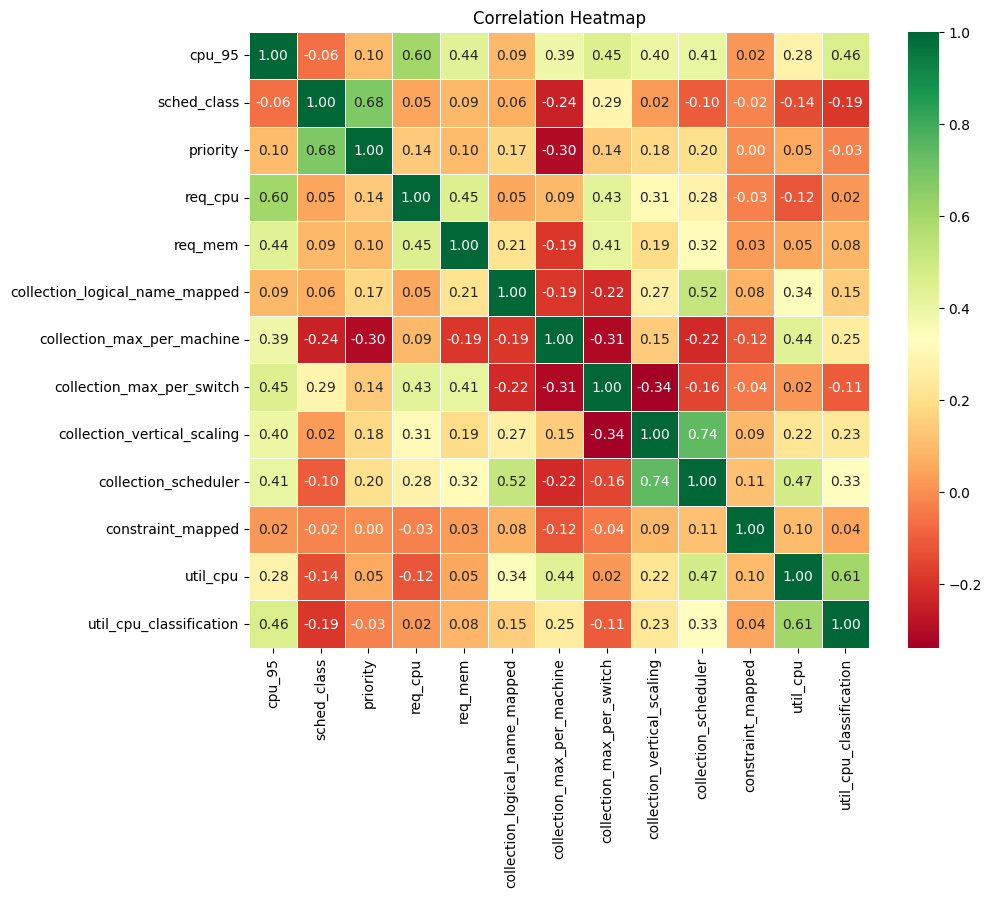

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
variables = [
    'cpu_95', 'sched_class', 'priority', 'req_cpu', 'req_mem',
    'collection_logical_name_mapped', 'collection_max_per_machine', 'collection_max_per_switch',
    'collection_vertical_scaling', 'collection_scheduler', 'constraint_mapped', 'util_cpu', 'util_cpu_classification'
]

# Compute the correlation matrix
corr_matrix = df[variables].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

df

,machine_id,start_time,end_time,collection_id,instance_index,alloc_collection_id,cpu_95,sched_class,priority,req_cpu,...,collection_max_per_switch,collection_vertical_scaling,collection_scheduler,req_constraint,machine_cpu_cap,machine_mem_cap,util_cpu,collection_logical_name_mapped,constraint_str,constraint_mapped
0,31514965170,301000000,739000000,218332160982,163,0,0.001030,0,0,0.008102,...,<NA>,1,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.127119,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0
1,85723451736,302000000,1200000000,212549679059,290,0,0.000986,1,200,0.005371,...,<NA>,2,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,1.000000,0.500000,0.183594,1,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0
2,155164271,302000000,110400000000,39619462539,0,0,0.004372,2,200,0.002819,...,<NA>,3,0,[],0.259277,0.166748,1.550744,2,[],1
3,139894744608,302000000,1549000000,212549673339,4294,0,0.000927,1,200,0.005669,...,<NA>,1,0,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,1.000000,0.500000,0.163526,3,[{'name': '5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6...,2
4,2408873742,302000000,9214000000,218336226901,43,0,0.002972,1,200,0.016205,...,<NA>,1,0,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0.708984,0.666992,0.183380,4,[{'name': '9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRF...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,42479392074,70697000000,70932000000,219028773294,565,0,0.062744,1,103,0.021057,...,<NA>,2,1,[],0.708984,0.333496,2.979710,562,[],1
9999996,34118813443,70697000000,71689000000,219028773294,359,0,0.077148,1,103,0.021057,...,<NA>,2,1,[],0.958984,0.500000,3.663768,562,[],1
9999997,36403660815,70697000000,70945000000,219028773294,549,0,0.059265,1,103,0.021057,...,<NA>,2,1,[],1.000000,0.500000,2.814493,562,[],1
9999998,39376673014,70697000000,71691000000,219028773294,274,0,0.093018,1,103,0.021057,...,<NA>,2,1,[],0.958984,0.500000,4.417391,562,[],1


In [ ]:
df.to_parquet('mapped_grouped_util_cpu.parquet')

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Assuming you have already loaded your dataframe into a variable called 'df'
# Separate the input features (X) and the output variable (y)
X = df[        [
            "sched_class",
            "priority",
            "req_cpu",
            "req_mem",
            "constraint_mapped",
            "collection_logical_name_mapped",
            "collection_max_per_machine",
            "collection_max_per_switch",
            "collection_vertical_scaling",
            "collection_scheduler",
        ]]  # Input features
y = df["util_cpu_classification"]
X = X.fillna(0)               # Output variable
y = y.fillna(0)
# Perform feature selection using chi-squared
k_best_chi2 = SelectKBest(score_func=chi2, k=3)  # Select the top 3 features
X_chi2 = k_best_chi2.fit_transform(X, y)

# Get the selected feature indices
selected_indices_chi2 = k_best_chi2.get_support(indices=True)

# Retrieve the selected feature names
selected_features_chi2 = X.columns[selected_indices_chi2]

# Perform feature selection using mutual information
k_best_mi = SelectKBest(score_func=mutual_info_classif, k=3)  # Select the top 3 features
X_mi = k_best_mi.fit_transform(X, y)

# Get the selected feature indices
selected_indices_mi = k_best_mi.get_support(indices=True)

# Retrieve the selected feature names
selected_features_mi = X.columns[selected_indices_mi]

# Print the selected feature names for both chi-squared and mutual information
print("Selected features (chi-squared):", selected_features_chi2)
print("Selected features (mutual information):", selected_features_mi)


Selected features (chi-squared): Index(['collection_logical_name_mapped', 'collection_max_per_switch',
       'collection_scheduler'],
      dtype='object')
Selected features (mutual information): Index(['req_mem', 'collection_logical_name_mapped',
       'collection_vertical_scaling'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif


# Perform feature selection using ANOVA F-value
k_best_anova = SelectKBest(score_func=f_classif, k=3)  # Select the top 3 features
X_anova = k_best_anova.fit_transform(X, y)

# Get the selected feature indices
selected_indices_anova = k_best_anova.get_support(indices=True)

# Retrieve the selected feature names
selected_features_anova = X.columns[selected_indices_anova]

# Perform feature selection using Kendall's rank coefficient
k_best_kendall = SelectKBest(score_func=lambda X, y: pd.Series(X).corr(y, method="kendall"), k=3)  # Select the top 3 features
X_kendall = k_best_kendall.fit_transform(X, y)

# Get the selected feature indices
selected_indices_kendall = k_best_kendall.get_support(indices=True)

# Retrieve the selected feature names
selected_features_kendall = X.columns[selected_indices_kendall]

# Print the selected feature names for both ANOVA F-value and Kendall's rank coefficient
print("Selected features (ANOVA):", selected_features_anova)
print("Selected features (Kendall):", selected_features_kendall)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df[        [
            "sched_class",
            "priority",
            "req_cpu",
            "req_mem",
            "constraint_mapped",
            "collection_logical_name_mapped",
            "collection_max_per_machine",
            "collection_max_per_switch",
            "collection_vertical_scaling",
            "collection_scheduler",
        ]]  # Input features
y = df["util_cpu_classification"]
X = X.fillna(-1)               # Output variable
y = y.fillna(-1)


# Create the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the classifier on the entire dataset
rf_classifier.fit(X, y)

# Get the feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a dictionary to store feature names and their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the ranked feature importance
print("Ranked feature importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Ranked feature importance:
collection_logical_name_mapped: 0.2302592870477844
req_mem: 0.19466917631081518
collection_scheduler: 0.18253224118220227
req_cpu: 0.14442440466474676
priority: 0.08801574752918975
collection_vertical_scaling: 0.07178661741300797
sched_class: 0.058284013680944706
constraint_mapped: 0.026421457436541722
collection_max_per_machine: 0.0032660084678729816
collection_max_per_switch: 0.00034104626689431265
